In [44]:
import glob
import json
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:3f}'.format

# Public Leaderboard (PB)

In [46]:
pb = pd.read_csv('public_leaderboard.csv',header=None)
pb.columns = ['experiment', 'rmse']
pb

,experiment,rmse
0,01-01,156.223821
1,01-02,153.679678
2,02-02,154.514020
3,02-07,154.046777
4,02-12,150.927453
5,02-13,152.187870
6,03-02,151.677019
7,04-02,150.810163
8,04-22,148.285239
9,04-24,149.735266


# Local CV

In [47]:
cv = []
for filepath in glob.glob(os.path.join('*', 'metrics.json')):
    experiment = os.path.split(filepath)[0]
    with open(filepath, 'r') as f:
        metrics = json.load(f)
    cv.append([experiment, metrics['valid_loss'], metrics['valid_losses_avg'], metrics['valid_losses_std']])
cv = pd.DataFrame(cv, columns=['experiment', 'valid_loss', 'valid_losses_avg', 'valid_losses_std'])
cv

,experiment,valid_loss,valid_losses_avg,valid_losses_std
0,01-01,199.964769,108.884375,2.360160
1,01-02,199.099051,106.999095,3.006433
2,01-03,203.720097,122.039748,2.513364
3,02-01,199.499959,108.459800,2.652697
4,02-02,199.275750,106.721206,2.897792
5,02-03,199.886414,108.494788,2.910522
6,02-04,203.776117,122.235166,2.598303
7,02-05,207.915460,136.179659,2.624863
8,02-06,199.394564,108.022102,2.810462
9,02-07,199.303432,106.417679,2.734128


In [48]:
cv.sort_values('valid_loss').head(5)

,experiment,valid_loss,valid_losses_avg,valid_losses_std
51,05-04,191.847135,179.086924,2.289582
49,05-02,194.932444,126.222705,1.495535
55,05-09,195.030606,112.726741,2.565139
48,05-01,195.208824,114.601035,2.063140
53,05-07,195.258249,109.756960,2.369640


# CV vs PB

In [49]:
cv_pb = pd.merge(cv, pb, how='left')
cv_pb

,experiment,valid_loss,valid_losses_avg,valid_losses_std,rmse
0,01-01,199.964769,108.884375,2.360160,156.223821
1,01-02,199.099051,106.999095,3.006433,153.679678
2,01-03,203.720097,122.039748,2.513364,NaN
3,02-01,199.499959,108.459800,2.652697,NaN
4,02-02,199.275750,106.721206,2.897792,154.514020
5,02-03,199.886414,108.494788,2.910522,NaN
6,02-04,203.776117,122.235166,2.598303,NaN
7,02-05,207.915460,136.179659,2.624863,NaN
8,02-06,199.394564,108.022102,2.810462,NaN
9,02-07,199.303432,106.417679,2.734128,154.046777


,valid_loss,valid_losses_avg,valid_losses_std,rmse
valid_loss,1.000000,0.055106,0.397142,-0.625878
valid_losses_avg,0.055106,1.000000,-0.146454,0.969453
valid_losses_std,0.397142,-0.146454,1.000000,-0.249444
rmse,-0.625878,0.969453,-0.249444,1.000000


<Figure size 648x648 with 0 Axes>

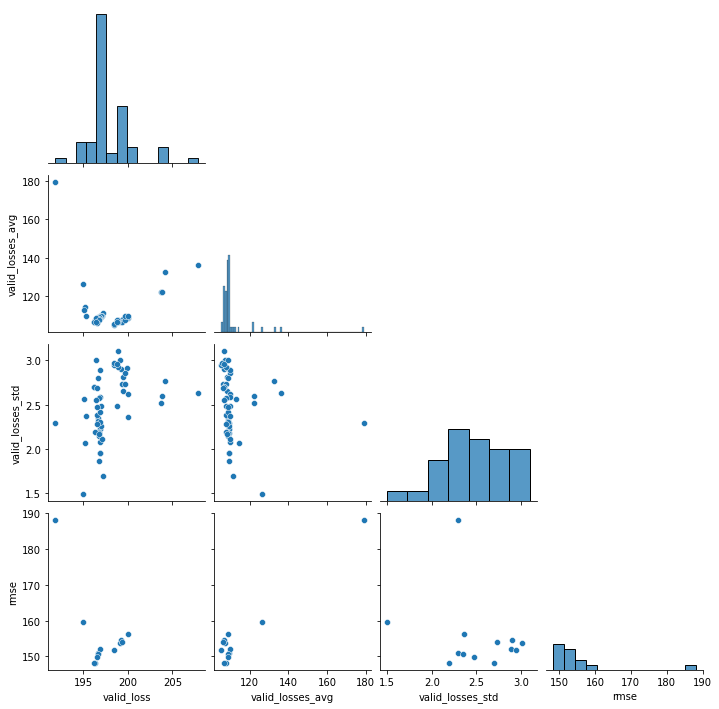

In [50]:
plt.figure(figsize=(9, 9))
sns.pairplot(cv_pb, corner=True)
cv_pb.corr()

,valid_loss,valid_losses_avg,valid_losses_std,rmse
valid_loss,1.000000,0.776564,0.374930,0.922427
valid_losses_avg,0.776564,1.000000,-0.087872,-0.065232
valid_losses_std,0.374930,-0.087872,1.000000,0.358223
rmse,0.922427,-0.065232,0.358223,1.000000


<Figure size 648x648 with 0 Axes>

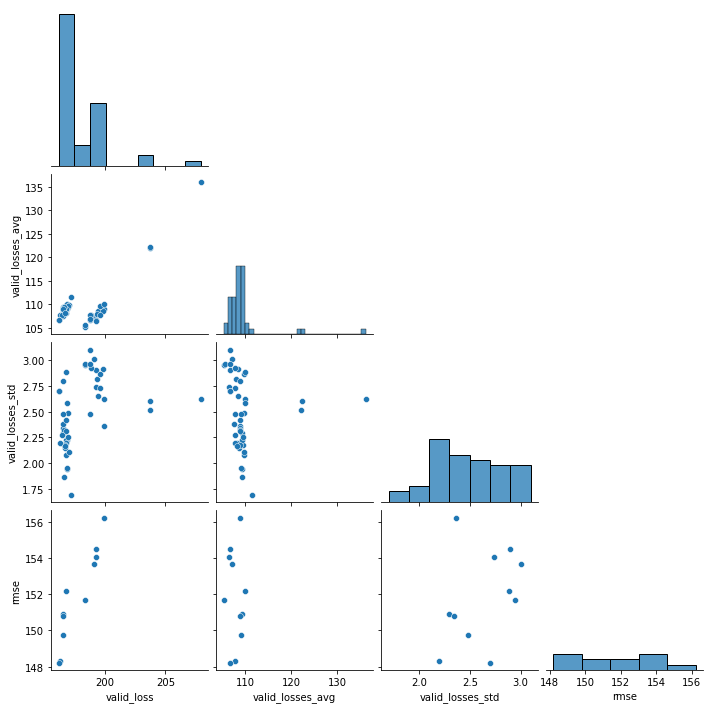

In [51]:
plt.figure(figsize=(9, 9))
sns.pairplot(cv_pb.query('experiment < "05-01"'), corner=True)
cv_pb.query('experiment < "05-01" or experiment > "05-09"').corr()

# Classification model performances

In [52]:
f1, precision, recall = [], [], []
for filepath in glob.glob(os.path.join('*', 'log.log')):
    experiment = os.path.split(filepath)[0]
    with open(filepath, 'r') as f:
        log = f.read()
    for line in log.splitlines():
        _, __, ___, msg = line.split(' - ')
        if msg.startswith('Validation f1 score:'):
            f1.append((experiment, float(msg.split(': ')[-1])))
        elif msg.startswith('Validation precision:'):
            precision.append((experiment, float(msg.split(': ')[-1])))
        elif msg.startswith('Validation recall:'):
            recall.append((experiment, float(msg.split(': ')[-1])))
        else:
            pass

f1 = pd.DataFrame(data=f1, columns=['experiment', 'f1']).groupby('experiment').mean()
precision = pd.DataFrame(data=precision, columns=['experiment', 'precision']).groupby('experiment').mean()
recall = pd.DataFrame(data=recall, columns=['experiment', 'recall']).groupby('experiment').mean()

In [53]:
# recall は途中から取り始めた
scores = pd.concat([f1, precision, recall], axis=1)
scores

,f1,precision,recall
experiment,,,
02-12,0.620156,0.521519,NaN
02-13,0.620156,0.521519,NaN
02-14,0.621382,0.522667,NaN
04-01,0.655006,0.556913,NaN
04-02,0.636434,0.535104,NaN
04-03,0.651944,0.556817,NaN
04-04,0.641316,0.537443,NaN
04-05,0.623507,0.523608,NaN
04-06,0.619236,0.520297,NaN


# Submissions

In [54]:
submission_dfs = []

In [55]:
for i, filepath in enumerate(glob.glob(os.path.join('*', '*_submission.csv'))):
    experiment = os.path.split(filepath)[0]
    submission = pd.read_csv(filepath, header=None)
    submission.columns = ['id', experiment]
    submission = submission.set_index('id').sort_index()
    submission_dfs.append(submission)

In [56]:
submissions = pd.concat(submission_dfs, axis=1)

In [57]:
submissions

,01-01,01-02,01-03,02-01,02-02,02-03,02-04,02-05,02-06,02-07,02-08,02-09,02-11,02-12,02-13,02-14,03-01,03-02,03-03,03-04,03-05,03-06,04-01,04-02,04-03,04-04,04-05,04-06,04-07,04-08,04-09,04-10,04-12,04-14,04-15,04-16,04-17,04-18,04-19,04-20,04-21,04-22,04-23,04-24,04-25,04-26,04-27,04-28,05-01,05-02,05-03,05-04,05-06,05-07,05-08,05-09,05-10,05-11
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,205.808127,257.789459,307.293008,202.348529,261.628003,212.425292,303.280555,244.733931,209.891306,261.580224,214.628988,201.533518,201.619131,280.204221,295.467146,280.179586,228.567244,257.702132,214.390764,236.718884,270.423857,208.756966,285.380434,286.742934,303.260778,299.214670,279.839762,277.691131,275.929970,263.890390,263.945379,261.128448,279.644395,275.897569,279.816889,283.077625,275.419100,241.955747,239.233652,258.094106,285.787404,294.358232,285.344332,271.402357,299.692003,252.809735,284.376442,284.376442,321.361017,321.361017,144.436920,321.361017,286.288087,321.361017,209.697965,321.361017,294.951858,288.132576
1,124.064613,148.900856,161.020595,118.596403,145.290253,139.755822,160.921264,144.596975,118.202949,147.456271,140.331216,114.178458,133.847903,137.986403,149.778841,152.405902,121.881946,152.627426,145.365028,119.246312,153.714015,141.101602,165.853300,143.587561,173.480254,131.798962,153.101796,147.032961,152.890352,163.498062,165.629138,170.248403,173.551689,156.985166,152.257793,141.542331,159.120708,144.300138,136.005404,150.491824,132.888736,134.313245,136.310920,140.691940,142.382184,192.541858,149.516457,149.516457,136.391376,136.391376,136.391376,235.409085,136.391376,136.391376,136.391376,136.391376,152.616431,159.524865
2,88.038007,102.860012,87.100533,90.417085,101.418730,95.541242,86.959108,80.235118,87.922665,96.793944,99.564212,79.789212,95.431188,112.826702,114.286324,112.645450,88.625778,102.727475,102.471896,93.306322,105.406380,104.689966,116.493730,120.958077,119.237298,117.557798,127.110335,114.619427,123.133342,101.220537,124.766212,119.079473,114.248061,132.969993,134.805083,144.028691,138.008345,103.604494,110.758863,113.632146,111.742956,97.047668,115.393207,114.865261,121.202315,112.086481,98.625646,98.625646,88.932438,88.932438,88.932438,309.081287,88.932438,88.932438,88.932438,88.932438,99.566459,106.707770
3,132.787021,129.632556,150.852140,134.456661,139.431870,142.777168,154.412389,161.115089,137.339048,130.992500,132.223490,136.837471,131.881768,220.122889,201.794748,202.527930,140.001298,132.735823,135.264684,139.939657,133.054630,139.091634,129.534133,135.196998,121.655307,124.645819,213.895334,214.818735,211.876148,142.367597,169.640036,167.082319,221.793569,172.175653,253.474408,238.712072,245.452134,209.424764,205.861068,244.368692,122.967839,141.269588,175.270217,228.103508,120.195655,193.570292,188.223351,188.223351,123.568741,373.152281,123.568741,373.152281,123.568741,123.568741,123.568741,123.568741,167.623642,184.598397
4,146.274951,141.728702,156.728974,140.444560,140.657675,118.881516,157.256435,137.162421,142.538797,138.033256,125.315368,143.138613,126.740176,129.077555,131.669997,118.772211,141.690197,137.803255,123.098432,141.780215,140.793381,125.137910,120.953756,115.174501,109.157398,117.976473,129.159689,127.721061,125.939736,116.723122,114.523437,113.783630,121.468836,118.966816,119.354164,112.424619,112.397217,126.419566,125.520625,127.849567,132.034569,121.860522,116.082668,125.730401,108.359107,111.027772,116.743814,116.743814,112.534451,112.534451,112.534451,112.534451,112.534451,112.534451,112.534451,112.534451,115.025725,109.635627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18523,182.293718,193.864234,181.242265,194.781629,185.545817,174.483632,180.607182,184.174721,189.048006,186.905457,172.247522,189.844682,174.156318,205.081786,207.648234,199.760

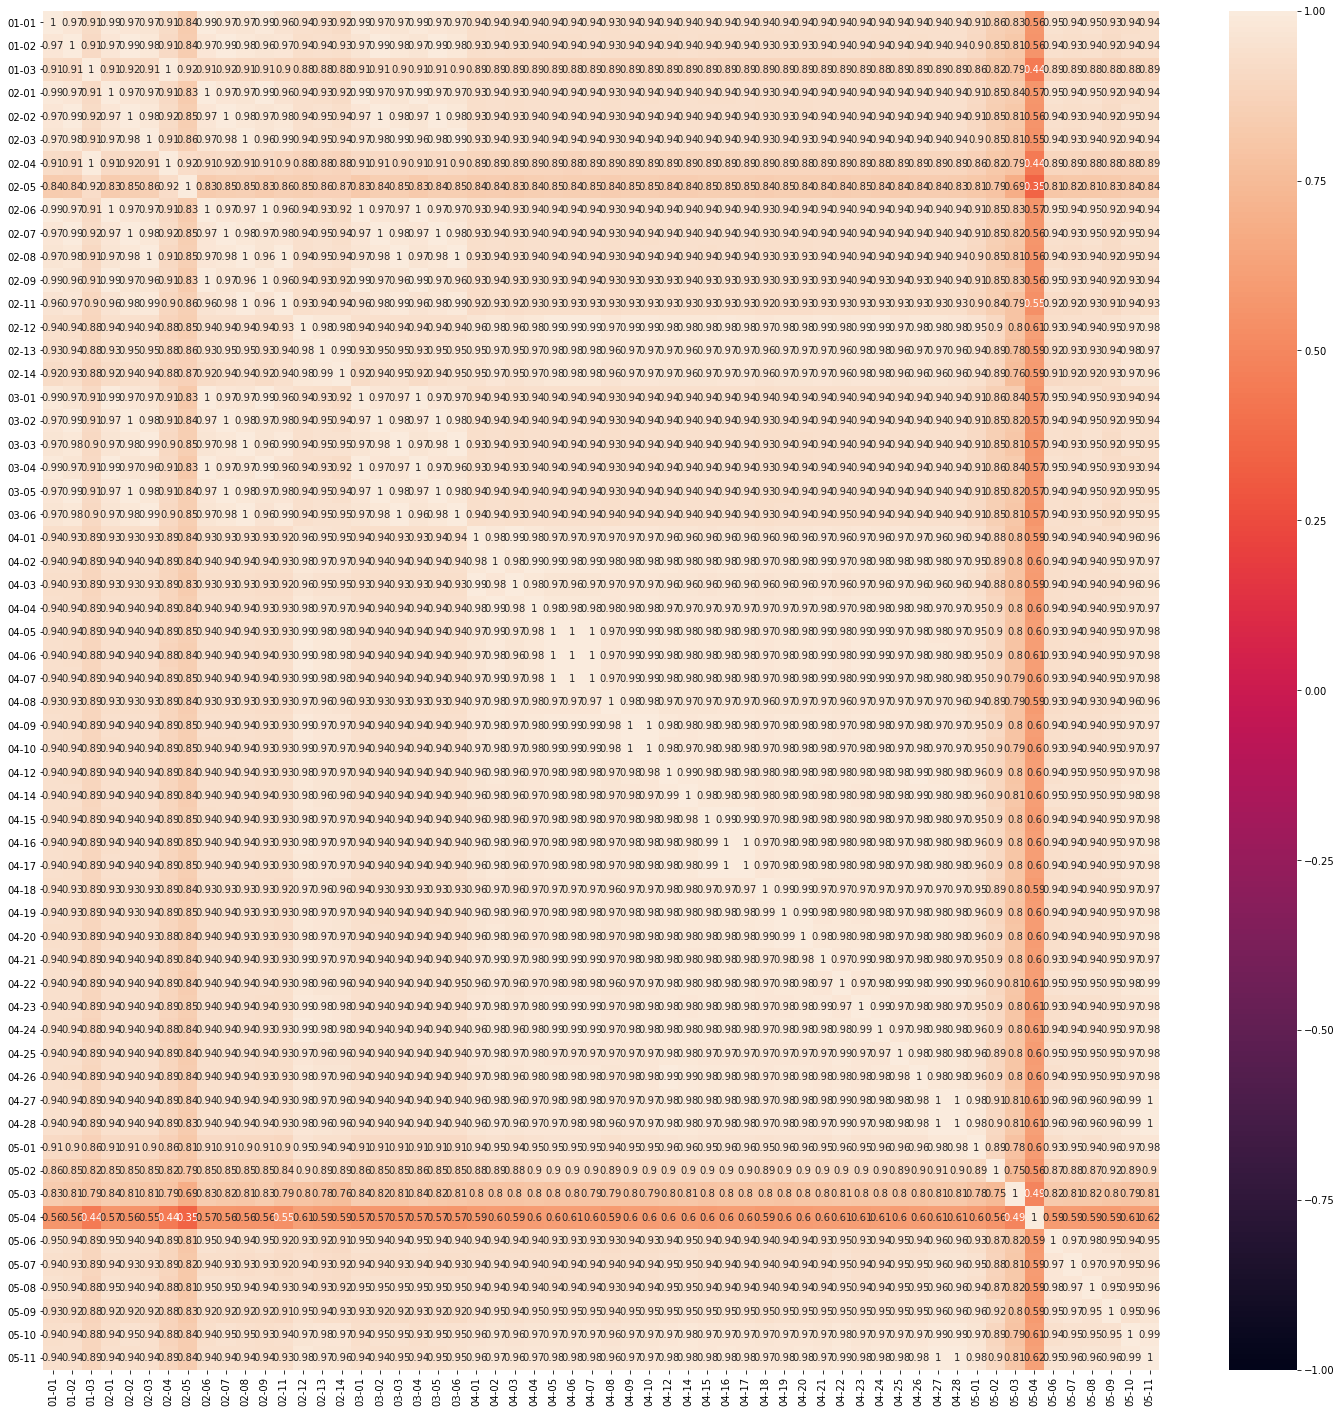

In [58]:
fig = plt.figure(figsize=(25., 25.))
sns.heatmap(submissions.corr(), vmin=-1, vmax=1, annot=True);

In [59]:
submissions.corr()

,01-01,01-02,01-03,02-01,02-02,02-03,02-04,02-05,02-06,02-07,02-08,02-09,02-11,02-12,02-13,02-14,03-01,03-02,03-03,03-04,03-05,03-06,04-01,04-02,04-03,04-04,04-05,04-06,04-07,04-08,04-09,04-10,04-12,04-14,04-15,04-16,04-17,04-18,04-19,04-20,04-21,04-22,04-23,04-24,04-25,04-26,04-27,04-28,05-01,05-02,05-03,05-04,05-06,05-07,05-08,05-09,05-10,05-11
01-01,1.000000,0.973062,0.914391,0.991847,0.971998,0.967002,0.914845,0.835302,0.993463,0.973741,0.967784,0.990955,0.958548,0.939656,0.931922,0.921235,0.992076,0.972754,0.966515,0.991912,0.972414,0.966054,0.935910,0.940769,0.935009,0.940688,0.940081,0.940001,0.941175,0.934848,0.940123,0.938103,0.940854,0.942312,0.938427,0.939601,0.939226,0.935858,0.937797,0.937295,0.939391,0.944310,0.940899,0.939644,0.943228,0.940416,0.944834,0.943708,0.910310,0.855857,0.833138,0.564027,0.950438,0.938135,0.949056,0.926361,0.937252,0.942687
01-02,0.973062,1.000000,0.910569,0.969597,0.992239,0.979555,0.909747,0.842515,0.970035,0.993795,0.981311,0.964501,0.973786,0.937425,0.944624,0.933446,0.968352,0.992981,0.979829,0.967551,0.992722,0.979436,0.932365,0.938278,0.932198,0.937475,0.936638,0.936901,0.938223,0.930508,0.937400,0.935044,0.937390,0.937981,0.935419,0.936450,0.935856,0.929840,0.932558,0.933187,0.936304,0.940476,0.939229,0.936800,0.938489,0.936073,0.939921,0.938992,0.904081,0.849569,0.814110,0.561894,0.937752,0.930865,0.943596,0.918698,0.943383,0.940691
01-03,0.914391,0.910569,1.000000,0.908950,0.916008,0.908410,0.998326,0.923182,0.910032,0.915875,0.906191,0.910394,0.898139,0.883466,0.884711,0.879781,0.907075,0.912828,0.902076,0.906455,0.913403,0.901682,0.887378,0.889347,0.888137,0.891049,0.889530,0.883771,0.888460,0.889074,0.888756,0.886709,0.890258,0.890036,0.891138,0.890202,0.889993,0.886876,0.887134,0.885593,0.886915,0.889734,0.888756,0.881197,0.890720,0.889266,0.888190,0.887096,0.860395,0.819155,0.789951,0.444367,0.885989,0.885344,0.881703,0.880330,0.883444,0.886722
02-01,0.991847,0.969597,0.908950,1.000000,0.972333,0.968465,0.909331,0.830019,0.995819,0.972253,0.967855,0.992613,0.957479,0.939079,0.930655,0.920797,0.994022,0.972061,0.966767,0.993989,0.971773,0.966152,0.933497,0.938744,0.932322,0.937979,0.938035,0.939130,0.939348,0.932122,0.938432,0.936885,0.938848,0.941201,0.937372,0.937396,0.938252,0.934279,0.935693,0.935656,0.937659,0.943401,0.939769,0.938841,0.940317,0.937881,0.943463,0.942557,0.908949,0.854019,0.835051,0.567185,0.950642,0.937701,0.949668,0.924924,0.935452,0.941277
02-02,0.971998,0.992239,0.916008,0.972333,1.000000,0.983522,0.915798,0.850162,0.971749,0.996509,0.983351,0.967480,0.976672,0.939720,0.948505,0.937193,0.969924,0.995889,0.981778,0.968710,0.996073,0.980982,0.933420,0.940297,0.933591,0.939512,0.938959,0.939271,0.940501,0.932522,0.940007,0.937867,0.939537,0.940584,0.938708,0.938800,0.938797,0.932617,0.934927,0.935105,0.938455,0.942109,0.941655,0.938679,0.939887,0.937681,0.941331,0.940347,0.905471,0.850489,0.814787,0.561649,0.939196,0.932976,0.944830,0.920727,0.945880,0.942200
02-03,0.967002,0.979555,0.908410,0.968465,0.983522,1.000000,0.908316,0.855753,0.968579,0.982545,0.995409,0.962987,0.990882,0.940352,0.945157,0.943668,0.966327,0.981601,0.994159,0.964975,0.981441,0.993720,0.932457,0.939804,0.931555,0.938663,0.939029,0.939413,0.940150,0.932115,0.940342,0.938161,0.939023,0.939936,0.937683,0.938333,0.938576,0.931927,0.935003,0.934534,0.938474,0.941487,0.941060,0.938799,0.938282,0.937902,0.941184,0.940086,0.904499,0.850511,0.806120,0.552513,0.935697,0.928753,0.943943,0.917764,0.944801,0.942374
02-04,0.914845,0.909747,0.998326,0.909331,0.915798,0.908316,1.000000,0.924089,0.910166,0.915405,0.905703,0.910523,0.897367,0.881971,0.883080,0.878165,0.907131,0.912268,0.901596,0.906652,0.912807,0.901177,0.886567,0.888105,0.887277,0.889896,0.888444,0.882530,0.887138,0.888043,0.887576,0.885445,0.889164,0.889056,0.889979,0.888925,0.888740,0.885882,0.885954,0.884448,0.885714,0.888750,0.887554,0.879923,0.889862,0.888220,0.887303,0.886203,0.859768,0.817617,0.790376,0.444147,0.886250,